# Importing the libraries needed for the project

In [11]:
# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras_preprocessing import image
import tensorflow.keras.layers as layers


# Sklearn model performance utils
from sklearn.metrics import roc_curve, plot_roc_curve, auc 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score

# Misc libraries for other tasks 
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# used to prepare the image directory and split into train , validate , test for keras
# import splitfolders

## loading the images into a tensor flow dataframe object 

In [2]:
# Split with a ratio only done once per project directory 
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

#image_folder = Path('/food_data/images')

#output_folder = Path('/food_data/output')

#splitfolders.ratio(image_folder, output=output_folder,
    #seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

## Creating the traning and test dataframes using keras 


In [3]:
# creatnig the training, testing and validation 
train_df = image_dataset_from_directory(
    directory = '/Users/jalhussain/ASU/ASU_Fintech/project2/Recipe_recommendation_bot/veg_fruits/train',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100)
    
    
    )

test_df = image_dataset_from_directory(
    directory = '/Users/jalhussain/ASU/ASU_Fintech/project2/Recipe_recommendation_bot/veg_fruits/test',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100)
    )

val_df = image_dataset_from_directory(
    directory = '/Users/jalhussain/ASU/ASU_Fintech/project2/Recipe_recommendation_bot/veg_fruits/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100)
    )


Found 2914 files belonging to 36 classes.
Found 571 files belonging to 36 classes.


2022-04-08 23:48:54.786062: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 563 files belonging to 36 classes.


## Visualizing the data 


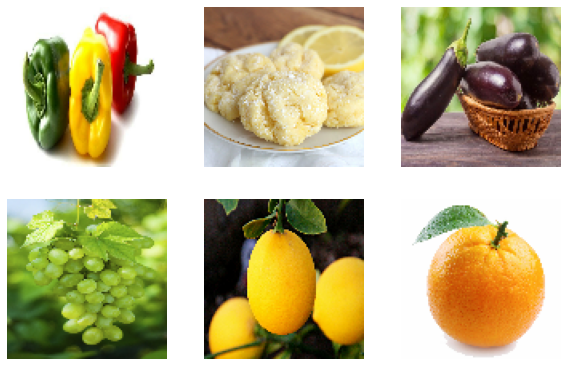

In [4]:
# plotting a sample of the images
plt.figure(figsize=(10,10))

for image , label in train_df.take(1):
    for i in range(6):
        ax = plt.subplot(3 ,3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')

## Convert images png to jpeg format 

## Define the model architecture

In [5]:
# The model will be a multi layer Conv2D and Maxpooling with Dropouts to help prevent overfitting , towrds the end 1 Dens layer will be there before our final output
model = Sequential()
#layer 1,2,3 sequence 
model.add(Conv2D(filters= 2, kernel_size=(3,3),activation='relu',input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
#layer 4,5,6 sequence 
model.add(Conv2D(filters= 4, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

#Dense Network
model.add(Flatten())
model.add(Dense(3000,activation='relu'))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500,activation='relu'))
#output layer with 36 classifications 
model.add(Dense(36,activation='softmax'))

# compile the model using the adam optimizer and categorical crossentropy for loss as we are using one-hot encoding style catagories
model.compile(optimizer='adam' , 
              loss='categorical_crossentropy' ,
              metrics=[
                    'accuracy',
                    tf.keras.metrics.TruePositives(name="tp"),
                    tf.keras.metrics.TrueNegatives(name="tn"),
                    tf.keras.metrics.FalsePositives(name="fp"),
                    tf.keras.metrics.FalseNegatives(name="fn"),
                    tf.keras.metrics.Precision(name="precision"),
                    tf.keras.metrics.Recall(name="recall"),
                    tf.keras.metrics.AUC(name="auc"),
                    ]
            )


# printing out a summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 2)         56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 2)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 2)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 4)         76        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 4)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 4)         0

In [6]:
# Fitting the model with our traning dataset
history = model.fit(train_df , epochs=100 , batch_size=10 , validation_data=val_df , verbose=1)

Epoch 1/100
92/92 [==============================] - 77s 767ms/step - loss: 43.4455 - accuracy: 0.0450 - tp: 34.0000 - tn: 101262.0000 - fp: 728.0000 - fn: 2880.0000 - precision: 0.0446 - recall: 0.0117 - auc: 0.5461 - val_loss: 3.5955 - val_accuracy: 0.0604 - val_tp: 0.0000e+00 - val_tn: 19704.0000 - val_fp: 1.0000 - val_fn: 563.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5999
Epoch 2/100
92/92 [==============================] - 66s 683ms/step - loss: 3.3718 - accuracy: 0.0975 - tp: 15.0000 - tn: 101951.0000 - fp: 39.0000 - fn: 2899.0000 - precision: 0.2778 - recall: 0.0051 - auc: 0.6900 - val_loss: 3.7126 - val_accuracy: 0.1350 - val_tp: 4.0000 - val_tn: 19703.0000 - val_fp: 2.0000 - val_fn: 559.0000 - val_precision: 0.6667 - val_recall: 0.0071 - val_auc: 0.6566
Epoch 3/100
92/92 [==============================] - 66s 680ms/step - loss: 3.0764 - accuracy: 0.1469 - tp: 79.0000 - tn: 101905.0000 - fp: 85.0000 - fn: 2835.0000 - precision: 0.4817 - recall: 0.02

In [7]:
#save the model for reuse and comparing 
model.save('model_vegies_fruits')
#saving the traning history of the latest model 
#with open('/trainHistoryDict', 'wb') as file_pi:
    #pickle.dump(history.history, file_pi)
    
model_json = model.to_json()

2022-04-09 01:46:40.480052: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_vegies_fruits/assets


## loading previous models to use

In [ ]:
#model1 = keras.models.load_model('model1')
#model1.predict()

In [8]:
# evaluate the model 
model.evaluate(test_df)

#make predictions 
predictions = model.predict(test_df)

#creating callbacks for tensorflow summary 
#jaccard_score(test_df,predictions)

18/18 [==============================] - 12s 325ms/step - loss: 3.5494 - accuracy: 0.5884 - tp: 334.0000 - tn: 19856.0000 - fp: 129.0000 - fn: 237.0000 - precision: 0.7214 - recall: 0.5849 - auc: 0.8482


## Model performance metrics and evaluation 

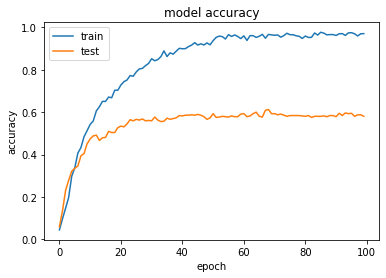

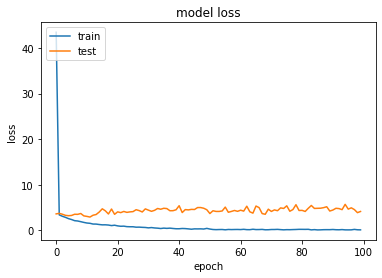

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# create a confusion matrix for the 36 classes
cm = confusion_matrix(test_df.classes, predictions.argmax(axis=1))
ConfusionMatrixDisplay(display_labels=test_df.classes).plot(cm)

AttributeError: 'BatchDataset' object has no attribute 'classes'

## Predictions and Inferences on new Data

In [10]:
val_predictions = model.predict(val_df)